## Task 2
### Run two classification algorithms--Naïve Bayes (NB) and Random Forest (RF)--on the [Mushroom Database](data/mushroom.arff).

### Problem 3: Cross-validation
### Run each of the NB and RF classifier once by a certain value for number of folds for cross-validation (e.g. 5 folds).
### Mushroom dataset is having nominal values.But it is having missing values which we need to fill before run any algorithm on it based on either mode or median value.To achieve this using Panda package.

In [317]:
from scipy.io import arff
import pandas as pd

data1,m = arff.loadarff('data/mushroom.arff')
#print data1
df = pd.DataFrame(data=data1)

#by default prints 5 rows from dataframe
df.head(10)


,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,'x','s','n','t','p','f','c','n','k','e',...,'w','w','p','w','o','p','k','s','u','p'
1,'x','s','y','t','a','f','c','b','k','e',...,'w','w','p','w','o','p','n','n','g','e'
2,'b','s','w','t','l','f','c','b','n','e',...,'w','w','p','w','o','p','n','n','m','e'
3,'x','y','w','t','p','f','c','n','n','e',...,'w','w','p','w','o','p','k','s','u','p'
4,'x','s','g','f','n','f','w','b','k','t',...,'w','w','p','w','o','e','n','a','g','e'
5,'x','y','y','t','a','f','c','b','n','e',...,'w','w','p','w','o','p','k','n','g','e'
6,'b','s','w','t','a','f','c','b','g','e',...,'w','w','p','w','o','p','k','n','m','e'
7,'b','y','w','t','l','f','c','b','n','e',...,'w','w','p','w','o','p','n','s','m','e'
8,'x','y','w','t','p','f','c','n','p','e',...,'w','w','p','w','o','p','k','v','g','p'
9,'b','s','y','t','a','f','c','b','g','e',...,'w','w','p','w','o','p','k','s','m','e'


In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises?                    8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number                 8124 non-null object
ring-type  

In [319]:
df.describe()


,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,'x','y','n','f','n','f','c','b','b','t',...,'w','w','p','w','o','p','w','v','d','e'
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


In [320]:
df.index


RangeIndex(start=0, stop=8124, step=1)

In [321]:
df.columns

Index([u'cap-shape', u'cap-surface', u'cap-color', u'bruises?', u'odor',
       u'gill-attachment', u'gill-spacing', u'gill-size', u'gill-color',
       u'stalk-shape', u'stalk-root', u'stalk-surface-above-ring',
       u'stalk-surface-below-ring', u'stalk-color-above-ring',
       u'stalk-color-below-ring', u'veil-type', u'veil-color', u'ring-number',
       u'ring-type', u'spore-print-color', u'population', u'habitat',
       u'class'],
      dtype='object')

In [322]:

df[["cap-shape","cap-surface"]]

,cap-shape,cap-surface
0,'x','s'
1,'x','s'
2,'b','s'
3,'x','y'
4,'x','s'
5,'x','y'
6,'b','s'
7,'b','y'
8,'x','y'
9,'b','s'


In [323]:
from datacleaner import autoclean

In [324]:
my_clean_data = autoclean(df)

In [325]:
print(my_clean_data)

      cap-shape  cap-surface  cap-color  bruises?  odor  gill-attachment  \
0             5            2          4         1     6                1   
1             5            2          9         1     0                1   
2             0            2          8         1     3                1   
3             5            3          8         1     6                1   
4             5            2          3         0     5                1   
5             5            3          9         1     0                1   
6             0            2          8         1     0                1   
7             0            3          8         1     3                1   
8             5            3          8         1     6                1   
9             0            2          9         1     0                1   
10            5            3          9         1     3                1   
11            5            3          9         1     0                1   
12          

In [326]:
x = df[df.columns.drop('class')]
print(x)

      cap-shape  cap-surface  cap-color  bruises?  odor  gill-attachment  \
0             5            2          4         1     6                1   
1             5            2          9         1     0                1   
2             0            2          8         1     3                1   
3             5            3          8         1     6                1   
4             5            2          3         0     5                1   
5             5            3          9         1     0                1   
6             0            2          8         1     0                1   
7             0            3          8         1     3                1   
8             5            3          8         1     6                1   
9             0            2          9         1     0                1   
10            5            3          9         1     3                1   
11            5            3          9         1     0                1   
12          

In [327]:
y = df['class']
print(y)

0       1
1       0
2       0
3       1
4       0
5       0
6       0
7       0
8       1
9       0
10      0
11      0
12      0
13      1
14      0
15      0
16      0
17      1
18      1
19      1
20      0
21      1
22      0
23      0
24      0
25      1
26      0
27      0
28      0
29      0
       ..
8094    0
8095    1
8096    0
8097    1
8098    1
8099    0
8100    0
8101    1
8102    0
8103    0
8104    0
8105    0
8106    0
8107    0
8108    1
8109    0
8110    0
8111    0
8112    0
8113    1
8114    1
8115    0
8116    1
8117    1
8118    1
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64


In [328]:
from sklearn.naive_bayes import MultinomialNB

gnb = MultinomialNB()

In [329]:
#5 
 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gnb, x ,y,scoring='accuracy', cv=5)
print (scores)
print (scores.mean())

[ 0.57441574  0.504       0.69784615  0.99753695  0.67426108]
0.689611985512


In [330]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y,random_state = 0)

In [331]:
# predicting for class 'p'

Y_pred = gnb.fit(X_train, Y_train).predict(X_test)
y_pred_prob = gnb.predict_proba(X_test)[:, 0]


### For the results obtained, generate a [ROC curve](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html) for the class “p” (poisonous) for both the classifiers.



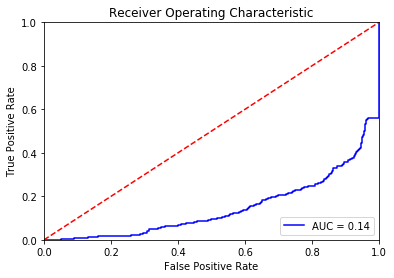

In [332]:
from sklearn import metrics
fpr,tpr,threshold = metrics.roc_curve(Y_test,y_pred_prob)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [333]:



from sklearn.ensemble import RandomForestClassifier
frt = RandomForestClassifier(warm_start= True, min_samples_leaf= 1, n_estimators= 800, min_samples_split= 5,max_features= 'log2', max_depth= 400, class_weight=None)
frt.fit(X_train, Y_train)

scores = cross_val_score(frt,x,y,scoring='accuracy',cv = 5)
print (scores)
print (scores.mean())


[ 0.84255843  1.          1.          1.          0.68780788]
0.906073261472


In [334]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y,random_state = 42)

In [335]:
Y_pred = frt.predict(X_test)
y_pred_prob = frt.predict_proba(X_test)[:,0]


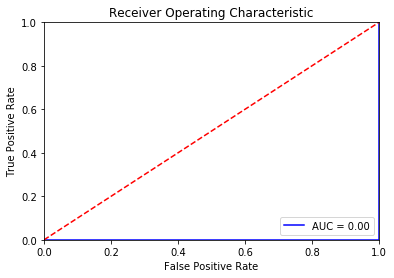

In [336]:
fpr,tpr,threshold = metrics.roc_curve(Y_test,y_pred_prob)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Problem 4: Percentage Split

### Run each of the NB and RF classifier once by selecting a certain percentage of training data (e.g. 40%).

### For the results obtained, generate a ROC curve for the class “e” (edible) for both the classifiers.


In [337]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y,test_size = 0.6,random_state = 0)

In [338]:
Y_pred = gnb.fit(X_train, Y_train).predict(X_test)
y_pred_prob = gnb.predict_proba(X_test)[:, 1]

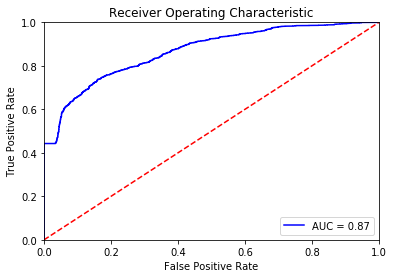

In [339]:
from sklearn import metrics
fpr,tpr,threshold = metrics.roc_curve(Y_test,y_pred_prob)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [340]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y,test_size = 0.6,random_state = 0)

In [341]:
Y_pred = gnb.fit(X_train, Y_train).predict(X_test)
y_pred_prob = frt.predict_proba(X_test)[:, 1]

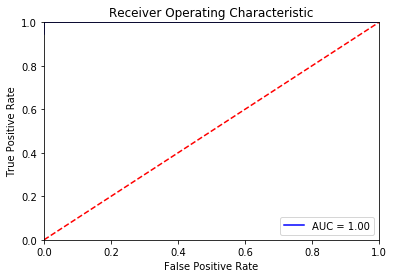

In [342]:
from sklearn import metrics
fpr,tpr,threshold = metrics.roc_curve(Y_test,y_pred_prob)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()